In [1]:
from datetime import date,timedelta
from nsepy import get_history
import numpy as np
import pandas as pd
from pandas import datetime

In [2]:
days_diff = 365
strt = date(2015,1,1)
ends = strt+timedelta(days=days_diff)
sbin = get_history(symbol='SBIN',
                    start= strt,
                    end=ends)

# sbin['Date'] = sbin.index
sbin = sbin.reset_index()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


/home/mayank/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [5]:
sbin.shape

(249, 15)

In [6]:
sbin["Date"] = pd.to_datetime(sbin["Date"])

In [7]:
def moving_average(values,size):
    weights = np.repeat(1.0, size)/size
    smas = np.convolve(values,weights,'valid')
    print(type(smas))
    return smas

In [8]:
# size_arr = [4,16,28,40,52]
# colors = ['green','blue','black','red','brown']
# movin = []
# # plt.plot(sbin.index,sbin["Close"],color = 'cyan')
# for i in range(len(size_arr)):
#     movin.append(moving_average(sbin["Close"],7*size_arr[i]))
# #     print(type(movin[-1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


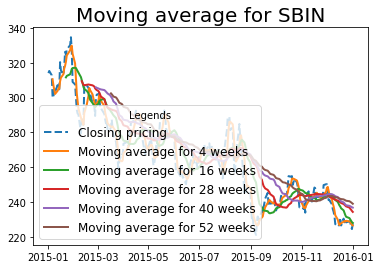

In [9]:
size_arr = [4,16,28,40,52]
# colors = ['green','blue','black','red','brown']
moving_avg = {}
# moving_avg["Date"] = sbin["Date"]
plt.title("Moving average for SBIN",fontsize=20)
plt.plot(sbin["Date"],sbin["Close"],label="Closing pricing",linestyle='--',linewidth=2)
# plt.plot(title="Moving average for SBIN")
# plt.show()
for i in range(len(size_arr)):
    a = [None for i in range(size_arr[i]-1)]
    a = np.array(a)
#     print(a.shape)
    moving_avg[size_arr[i]] = np.hstack([a,moving_average(sbin["Close"],size_arr[i])])
    sbin[str(size_arr[i])] = moving_avg[size_arr[i]]
#     print(size(moving_avg[size_arr[i]]))
#     movin.append(moving_average(sbin["Close"],size_arr[i]))
    name = "Moving average for "+str(size_arr[i])+" weeks"
    plt.plot(sbin["Date"],moving_avg[size_arr[i]],label = name,linewidth=2)
plt.legend(title = "Legends",loc = 3,prop={'size': 12})
plt.show()
# moving_avg.head()

In [10]:
# from datetime import date,timedelta
# from nsepy import get_history

In [11]:
# days_diff = 365
# strt = date(2015,1,1)
# ends = strt+timedelta(days=days_diff)
# sbin = get_history(symbol='SBIN',
#                     start= strt,
#                     end=ends)
# sbin = sbin.reset_index()

In [12]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,4,16,28,40,52
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059,None,None,None,None,None
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249,None,None,None,None,None
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208,None,None,None,None,None
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844,310.475,None,None,None,None
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743,307.012,None,None,None,None


In [13]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # Control the default size of figures in this Jupyter notebook
# %pylab inline
# pylab.rcParams['figure.figsize'] = (15, 9)

In [14]:
sbin.shape

(249, 20)

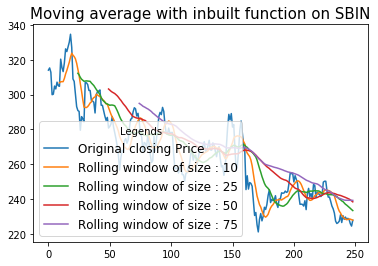

In [15]:
plt.title("Moving average with inbuilt function on SBIN",fontsize = 15)
plt.plot(sbin["Close"],label="Original closing Price")
rolling_size = ["10","25","50","75"]
for i in range(len(rolling_size)):
    sbin[rolling_size[i]] = np.round(sbin["Close"].rolling(window = int(rolling_size[i]), center = False).mean(), 2)
    name = "Rolling window of size : "+rolling_size[i]
    plt.plot(sbin[rolling_size[i]],label=name)
plt.legend(title = "Legends",loc = 3,prop={'size': 12})
plt.show()

In [16]:
# from datetime import date,timedelta
# from nsepy import get_history
# import numpy as np
# import pandas as pd
# from pandas import datetime

In [17]:
# days_diff = 365
# strt = date(2015,1,1)
# ends = strt+timedelta(days=days_diff)
# sbin = get_history(symbol='SBIN',
#                     start= strt,
#                     end=ends)

# # sbin['Date'] = sbin.index
# sbin = sbin.reset_index()

In [18]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # Control the default size of figures in this Jupyter notebook
# %pylab inline
# pylab.rcParams['figure.figsize'] = (15, 9)

In [19]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,%Deliverble,4,16,28,40,52,10,25,50,75
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,...,0.3059,None,None,None,None,None,NaN,NaN,NaN,NaN
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,...,0.4249,None,None,None,None,None,NaN,NaN,NaN,NaN
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,...,0.4208,None,None,None,None,None,NaN,NaN,NaN,NaN
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,...,0.4844,310.475,None,None,None,None,NaN,NaN,NaN,NaN
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,...,0.3743,307.012,None,None,None,None,NaN,NaN,NaN,NaN


In [20]:
sbin.shape

(249, 24)

In [21]:
sbin["prev_day"] = sbin.Volume.shift(1)

In [22]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,4,16,28,40,52,10,25,50,75,prev_day
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,...,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,...,None,None,None,None,None,NaN,NaN,NaN,NaN,6138488.0
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,...,None,None,None,None,None,NaN,NaN,NaN,NaN,9935094.0
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,...,310.475,None,None,None,None,NaN,NaN,NaN,NaN,9136716.0
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,...,307.012,None,None,None,None,NaN,NaN,NaN,NaN,15329257.0


In [23]:
sbin["Volume_Shock"] = ((((abs(sbin["prev_day"]-sbin["Volume"]))/sbin["Volume"])*100)>10).astype(int)

In [24]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,16,28,40,52,10,25,50,75,prev_day,Volume_Shock
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,0
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,...,None,None,None,None,NaN,NaN,NaN,NaN,6138488.0,1
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,...,None,None,None,None,NaN,NaN,NaN,NaN,9935094.0,0
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,...,None,None,None,None,NaN,NaN,NaN,NaN,9136716.0,1
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,...,None,None,None,None,NaN,NaN,NaN,NaN,15329257.0,0


In [25]:
def direction_shock(stock_name):
    if(stock_name["Volume_Shock"]==1):
        if(stock_name["Volume"]-stock_name["prev_day"]>0):
            return 1
        else:
            return 0
    else:
        return "Nan"
        

In [26]:
sbin["dir_shock"] = 'Nan'
sbin["dir_shock"] = sbin.apply(direction_shock,axis=1)

In [27]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,28,40,52,10,25,50,75,prev_day,Volume_Shock,dir_shock
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,...,None,None,None,NaN,NaN,NaN,NaN,NaN,0,Nan
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,...,None,None,None,NaN,NaN,NaN,NaN,6138488.0,1,1
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,...,None,None,None,NaN,NaN,NaN,NaN,9935094.0,0,Nan
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,...,None,None,None,NaN,NaN,NaN,NaN,9136716.0,1,1
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,...,None,None,None,NaN,NaN,NaN,NaN,15329257.0,0,Nan


In [28]:
sbin["prev_day_close"] = sbin.Close.shift(1)

In [29]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,40,52,10,25,50,75,prev_day,Volume_Shock,dir_shock,prev_day_close
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,...,None,None,NaN,NaN,NaN,NaN,NaN,0,Nan,NaN
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,...,None,None,NaN,NaN,NaN,NaN,6138488.0,1,1,314.00
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,...,None,None,NaN,NaN,NaN,NaN,9935094.0,0,Nan,315.25
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,...,None,None,NaN,NaN,NaN,NaN,9136716.0,1,1,312.75
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,...,None,None,NaN,NaN,NaN,NaN,15329257.0,0,Nan,299.90


In [30]:
sbin["Close_price_shock"] = ((((abs(sbin["prev_day_close"]-sbin["Close"]))/sbin["Close"])*100)>2).astype(int)

In [31]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,52,10,25,50,75,prev_day,Volume_Shock,dir_shock,prev_day_close,Close_price_shock
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,...,None,NaN,NaN,NaN,NaN,NaN,0,Nan,NaN,0
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,...,None,NaN,NaN,NaN,NaN,6138488.0,1,1,314.00,0
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,...,None,NaN,NaN,NaN,NaN,9935094.0,0,Nan,315.25,0
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,...,None,NaN,NaN,NaN,NaN,9136716.0,1,1,312.75,1
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,...,None,NaN,NaN,NaN,NaN,15329257.0,0,Nan,299.90,0


In [32]:
def direction__close_shock(stock_name):
    if(stock_name["Close_price_shock"]==1):
        if(stock_name["Close"]-stock_name["prev_day_close"]>0):
            return 1
        else:
            return 0
    else:
        return "Nan"

In [33]:
sbin["dir_shock_price"] = 'Nan'
sbin["dir_shock_price"] = sbin.apply(direction_shock,axis=1)

In [34]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,10,25,50,75,prev_day,Volume_Shock,dir_shock,prev_day_close,Close_price_shock,dir_shock_price
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,...,NaN,NaN,NaN,NaN,NaN,0,Nan,NaN,0,Nan
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,...,NaN,NaN,NaN,NaN,6138488.0,1,1,314.00,0,1
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,...,NaN,NaN,NaN,NaN,9935094.0,0,Nan,315.25,0,Nan
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,...,NaN,NaN,NaN,NaN,9136716.0,1,1,312.75,1,1
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,...,NaN,NaN,NaN,NaN,15329257.0,0,Nan,299.90,0,Nan


In [35]:
sbin["notVolShock"]  = (~(sbin["Volume_Shock"].astype(bool))).astype(int)
sbin["Pshock_w/o_volShock"] =  (sbin["notVolShock"] & sbin["dir_shock_price"]).astype(int)


In [36]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,50,75,prev_day,Volume_Shock,dir_shock,prev_day_close,Close_price_shock,dir_shock_price,notVolShock,Pshock_w/o_volShock
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,...,NaN,NaN,NaN,0,Nan,NaN,0,Nan,1,1
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,...,NaN,NaN,6138488.0,1,1,314.00,0,1,0,0
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,...,NaN,NaN,9935094.0,0,Nan,315.25,0,Nan,1,1
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,...,NaN,NaN,9136716.0,1,1,312.75,1,1,0,0
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,...,NaN,NaN,15329257.0,0,Nan,299.90,0,Nan,1,1


In [37]:
# fig = figure(x_axis_type="datetime")


In [38]:
# fig.line(sbin.index, sbin['Close'], color='blue', alpha=0.5)
# for i in sbin['s']
# show(fig)

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer,GnBu,Blues
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

output_notebook()


Loading BokehJS ...

In [40]:
# from datetime import date,timedelta
# from nsepy import get_history

In [41]:
# days_diff = 365
# strt = date(2015,1,1)
# ends = strt+timedelta(days=days_diff)
# sbin = get_history(symbol='SBIN',
#                     start= strt,
#                     end=ends)
# sbin = sbin.reset_index()

In [42]:
sbin.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,50,75,prev_day,Volume_Shock,dir_shock,prev_day_close,Close_price_shock,dir_shock_price,notVolShock,Pshock_w/o_volShock
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,...,NaN,NaN,NaN,0,Nan,NaN,0,Nan,1,1
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,...,NaN,NaN,6138488.0,1,1,314.00,0,1,0,0
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,...,NaN,NaN,9935094.0,0,Nan,315.25,0,Nan,1,1
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,...,NaN,NaN,9136716.0,1,1,312.75,1,1,0,0
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,...,NaN,NaN,15329257.0,0,Nan,299.90,0,Nan,1,1


In [43]:
fig = figure(x_axis_type="datetime")
fig.line(sbin.index, sbin['Close'], color='blue', alpha=0.5)

# fig.line(sbin.index[2:10],sbin['Close'],color='red',alpha=0.5)
# flag = False
# last_i = 0
# segments = []
# for i in range(len(sbin["Volume_Shock"])):
#     if(sbin["Volume_Shock"][i] and flag):
# #         fig.line(sbin.index[last_i:i], sbin['Close'], color='red', alpha=0.5)
#         segments.append((last_i,i))
#         flag = False
#     elif(sbin["Volume_Shock"][i]):
#         last_i = i
#         flag = True
# fig.segment(x0=sbin["Close"],x1=sbin["Close"],y0=segments[0],y1=segments[1])
fig.circle(sbin.index, sbin.Close*sbin["Pshock_w/o_volShock"], size=4, legend='price shock without vol shock')
show(fig)

In [52]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format("SBIN"))

    partial_autocorr = pacf(stock["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [53]:
draw_pacf(sbin)

/home/mayank/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 51), ('x', 50)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
